In [27]:
from keras import datasets, layers, models, losses
from tensorflow import keras
import tensorflow as tf
from enum import Enum
import sys
import os
import pathlib
from keras.utils import img_to_array, array_to_img
from tqdm import tqdm

# directory reach
LIBRARY_PATH = "./../"
sys.path.append(LIBRARY_PATH)
from model_helper.run_experiment import *
from datasets import pet

In [5]:
layer_name = "conv2d_52"
model = tf.keras.models.load_model("../saved_models/unet_pet")

In [6]:
RANGER,CLASSES = add_ranger_classes_to_model(model,layer_name,NUM_INJECTIONS=8)
model = RANGER.get_model()
layer = CLASSES_HELPER.get_layer(model,"classes_" + layer_name)
layer.set_mode(ErrorSimulatorMode.enabled)  #Enable the Selected Injection point

Layer [input_3] => has 1 outputs
Layer [conv2d_44] => has 1 outputs
Layer [conv2d_45] => has 2 outputs
Layer [max_pooling2d_8] => has 1 outputs
Layer [conv2d_46] => has 1 outputs
Layer [conv2d_47] => has 2 outputs
Layer [max_pooling2d_9] => has 1 outputs
Layer [conv2d_48] => has 1 outputs
Layer [conv2d_49] => has 2 outputs
Layer [max_pooling2d_10] => has 1 outputs
Layer [conv2d_50] => has 1 outputs
Layer [conv2d_51] => has 1 outputs
Layer [dropout_4] => has 2 outputs
Layer [max_pooling2d_11] => has 1 outputs
Layer [conv2d_52] => has 1 outputs
Layer [conv2d_53] => has 1 outputs
Layer [dropout_5] => has 1 outputs
Layer [up_sampling2d_8] => has 1 outputs
Layer [conv2d_54] => has 1 outputs
Layer [concatenate_8] => has 1 outputs
Layer [conv2d_55] => has 1 outputs
Layer [conv2d_56] => has 1 outputs
Layer [up_sampling2d_9] => has 1 outputs
Layer [conv2d_57] => has 1 outputs
Layer [concatenate_9] => has 1 outputs
Layer [conv2d_58] => has 1 outputs
Layer [conv2d_59] => has 1 outputs
Layer [up_s

In [29]:
train_batches,validation_batches,test_batches = pet.load_train()

2023-05-14 18:05:08,415 - absl - INFO - Load dataset info from /home/nicola/tensorflow_datasets/oxford_iiit_pet/3.2.0
2023-05-14 18:05:08,422 - absl - INFO - Reusing dataset oxford_iiit_pet (/home/nicola/tensorflow_datasets/oxford_iiit_pet/3.2.0)
2023-05-14 18:05:08,473 - absl - INFO - Constructing tf.data.Dataset oxford_iiit_pet for split None, from /home/nicola/tensorflow_datasets/oxford_iiit_pet/3.2.0


In [30]:
RANGER.tune_model_range(test_batches)
RANGER.set_ranger_mode(RangerModes.Disabled)

RESET ranger_conv2d_44 Ranges
RESET ranger_conv2d_45 Ranges
RESET ranger_max_pooling2d_8 Ranges
RESET ranger_conv2d_46 Ranges
RESET ranger_conv2d_47 Ranges
RESET ranger_max_pooling2d_9 Ranges
RESET ranger_conv2d_48 Ranges
RESET ranger_conv2d_49 Ranges
RESET ranger_max_pooling2d_10 Ranges
RESET ranger_conv2d_50 Ranges
RESET ranger_conv2d_51 Ranges
RESET ranger_max_pooling2d_11 Ranges
RESET ranger_conv2d_52 Ranges
RESET ranger_conv2d_53 Ranges
RESET ranger_conv2d_54 Ranges
RESET ranger_conv2d_55 Ranges
RESET ranger_conv2d_56 Ranges
RESET ranger_conv2d_57 Ranges
RESET ranger_conv2d_58 Ranges
RESET ranger_conv2d_59 Ranges
RESET ranger_conv2d_60 Ranges
RESET ranger_conv2d_61 Ranges
RESET ranger_conv2d_62 Ranges
RESET ranger_conv2d_63 Ranges
RESET ranger_conv2d_64 Ranges
RESET ranger_conv2d_65 Ranges
Tuning the moodel Range Domain
11/11 [==============================] - 36s 3s/step


2/2 [==============================] - 3s 2s/step


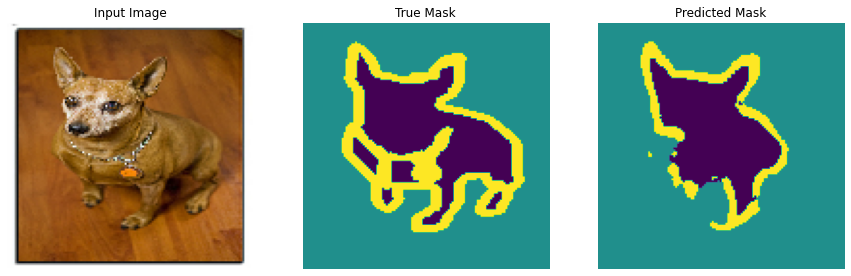

2/2 [==============================] - 3s 2s/step


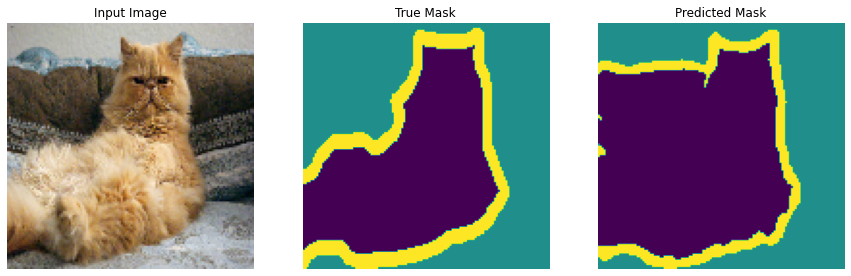

2/2 [==============================] - 3s 2s/step


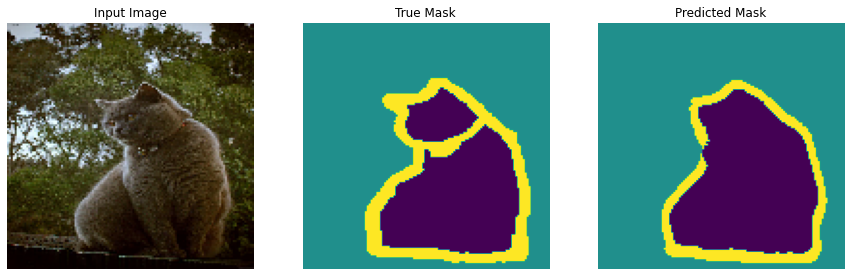

In [31]:
pet.show_predictions(model,test_batches,num=3)

2/2 [==============================] - 5s 2s/step


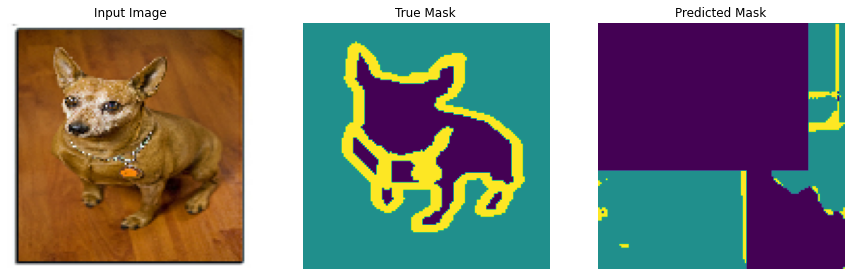

2/2 [==============================] - 3s 2s/step


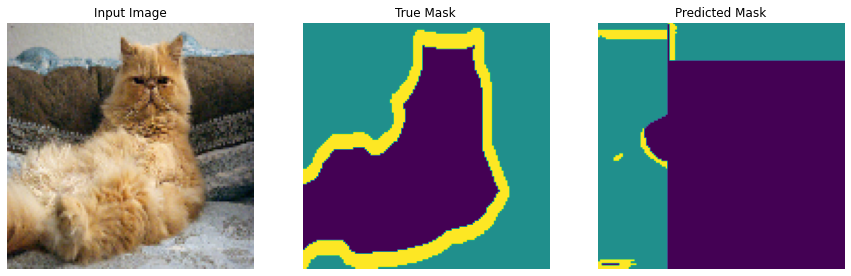

2/2 [==============================] - 3s 2s/step


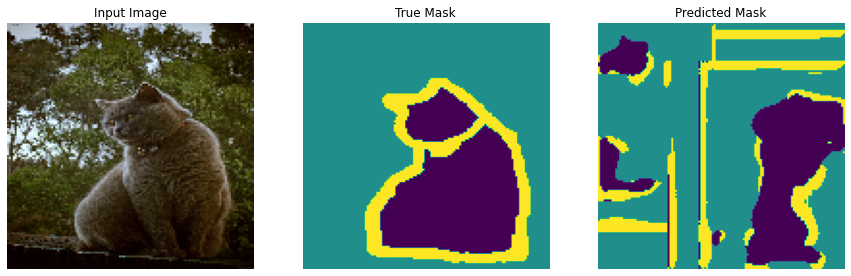

In [32]:
layer = CLASSES_HELPER.get_layer(classes_model,"classes_" + layer_name)
layer.set_mode(ErrorSimulatorMode.enabled)  #Enable the Selected Injection point
pet.show_predictions(classes_model,test_batches,num=3)

2/2 [==============================] - 4s 2s/step


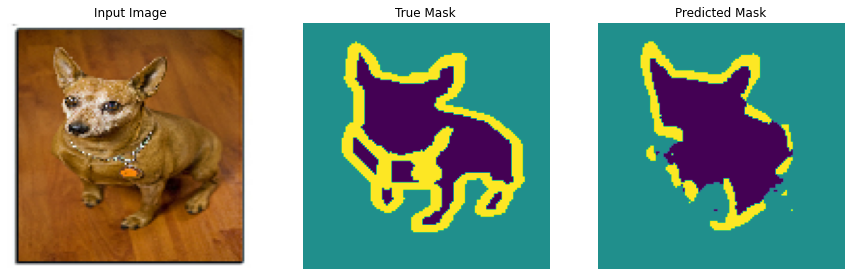

2/2 [==============================] - 4s 2s/step


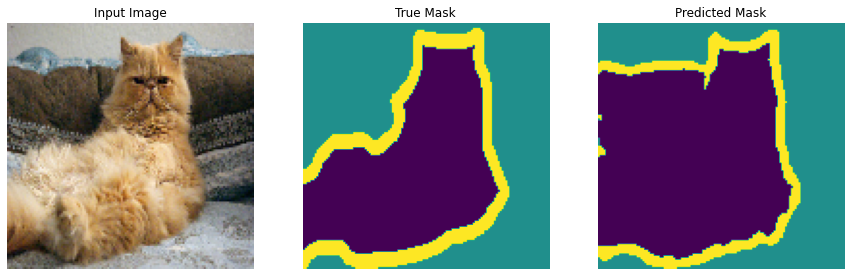

2/2 [==============================] - 4s 2s/step


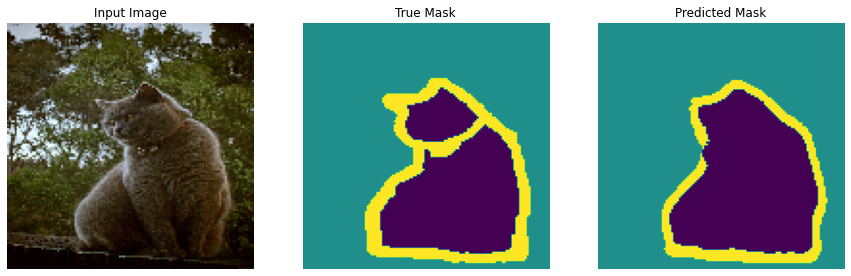

In [36]:
layer = CLASSES_HELPER.get_layer(classes_model,"classes_" + layer_name)
layer.set_mode(ErrorSimulatorMode.enabled)  #Enable the Selected Injection point
RANGER.set_ranger_mode(RangerModes.Inference,RangerPolicies.Clipper,RangerGranularity.Layer)
pet.show_predictions(classes_model,test_batches,num=3)